In [23]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rnd
import math as m
from scipy.stats import multivariate_normal, bernoulli
from copy import copy
from sklearn import preprocessing as pp
from sklearn.datasets import make_blobs
from sklearn.datasets import make_s_curve
import csv
import numpy as np
from sklearn import datasets
import random

def load_file(filename):
    raw_data = open(filename, 'rt')
    reader = csv.reader(raw_data, delimiter=',', quoting=csv.QUOTE_NONE)
    data = np.array(list(reader))
    X = data[:,:len(data[0]) - 1]
    X = np.array(X).astype('float')
    Y = data[:, -1]
    return (X,Y)

def load_magic():
    X, y = load_file('magic04.data')

    for i in range(len(y)):
        if y[i] == 'g':
            y[i] = 0
        elif y[i] == 'h':
            y[i] = 1
    
#delete duplicates in nparray
    y=y.astype(np.int64)
    y=y.reshape((len(y),1))
    data=np.hstack((X,y))
    unique_index= np.unique(data.dot(np.random.rand(11)), return_index= True)[1]
    u_data=data[unique_index]
    X = u_data[:,range(10)]
    y=u_data[:,-1]
    X=pp.scale(X)
    return (X, y)

def split_data(X,y,N_unlabeled):
    #get all the training data
    items = random.sample(range(len(y)),25+N_unlabeled)
    X_train = X[items,]
    y_train_true=y[items,]
    u_items = random.sample(range(len(y_train_true)),N_unlabeled)
    
    y_train = copy(y_train_true)
    train_mask_unl = np.zeros(y_train_true.shape, dtype=bool)
    train_mask_unl[u_items] = True
    y_train[train_mask_unl] = -1
    
    #get test data
    train_mask = np.zeros(X.shape[0], dtype=bool)
    train_mask[items]=True
    X_test,y_test=X[~train_mask,:],y[~train_mask]
    #print(y_train_true)
    #print('*************************')
    return X_train, y_train, y_train_true, X_test, y_test

def genData():
    X, y = make_blobs(n_samples=1000, centers=[(0,0), (1,1)], cluster_std=0.3)
    plt.scatter(X[:,0], X[:,1])

def get_ssgmm_labels(y, seed_prop=0.1):
    """Given ground truth, select sample at random to be labelled."""
    seeds = -np.ones(y.shape)
    
    positives = np.where(y == 1)[0]
    np.random.shuffle(positives)
    seed_count = int(seed_prop/2 * len(positives))
    seeds[positives[:seed_count]] = 1
    
    negatives = np.where(y == 0)[0]
    np.random.shuffle(negatives)
    seed_count = int(seed_prop/2 * len(negatives))
    seeds[negatives[:seed_count]] = 0
    
    return seeds


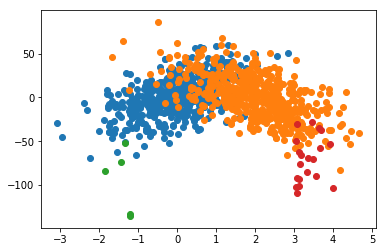

In [286]:
X1, X2 = datasets.make_regression(n_samples=500,n_features=1,n_targets=1,noise=20)
y1=np.ones(len(X1))
plt.scatter(X1,X2)
X3, X4 = datasets.make_regression(n_samples=500,n_features=1,n_targets=1,noise=20)
plt.scatter(-X3+2,X4)
y2=np.zeros(len(X3))

Xp=np.hstack((X1,np.reshape(X2,(500,1))))
Xn=np.hstack((X3,np.reshape(X4,(500,1))))

y=np.vstack((y1,y2))
labels=np.reshape(y,(1000,1))
labels=labels.astype(np.int64)
X=np.vstack((Xp,Xn))

#gen biased labeled data
xp1=np.reshape(np.random.sample(5)-2,(5,1))
xp2=np.reshape(np.random.sample(5)*100-140,(5,1))
plt.scatter(xp1,xp2)
xn1=np.reshape(np.random.sample(20)+3,(20,1))
xn2=np.reshape(np.random.sample(20)*100-120,(20,1))
plt.scatter(xn1,xn2)
#

Xtp=np.concatenate((xp1,xp2),axis=1)
#Xtp=np.reshape(np.hstack((xn1+3,xn2*100+50)),(20,2))
Xtn=np.hstack((xn1,xn2))

Xt=np.vstack((Xtp,Xtn))

ytp=np.reshape(np.ones(len(xt1)),(5,1))
ytn=np.reshape(np.zeros(len(xn1)),(20,1))

yt=np.reshape(np.vstack((ytp,ytn)),(25,1))
yt=yt.astype(np.int64)
X=np.concatenate((Xt,X),axis=0)
y=np.concatenate((yt,labels),axis=0)

In [269]:
labels[range(2)]
a=np.reshape(labels,(1000,))
a[range(20)]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

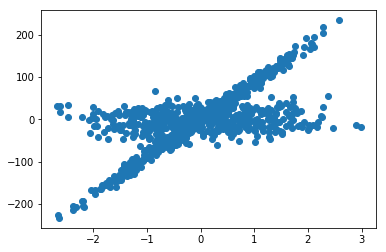

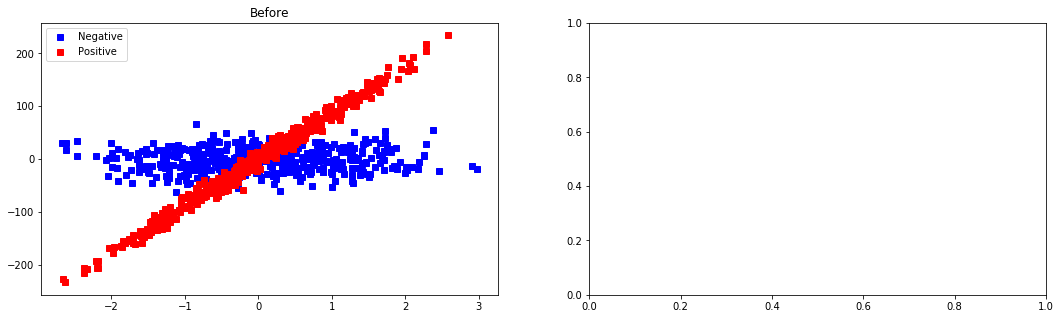

In [110]:
plt.scatter(X[:,0], X[:,1])
fig, ax = plt.subplots(1, 2, figsize=(18, 5))
ax0, ax1 = ax[0], ax[1]

#ax0.plot(X[labels==-1,0], X[labels==-1,1], 'g.', label='Unlabelled')
ax0.plot(X[labels==0,0], X[labels==0,1], 'bs', label='Negative')
ax0.plot(X[labels==1,0], X[labels==1,1], 'rs', label='Positive')
ax0.legend(loc='best', numpoints=1)
ax0.set_title('Before')